<a href="https://colab.research.google.com/github/catpixie-47/FDIP/blob/main/FDIP_2_123B1F047.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving flower.jpg to flower.jpg


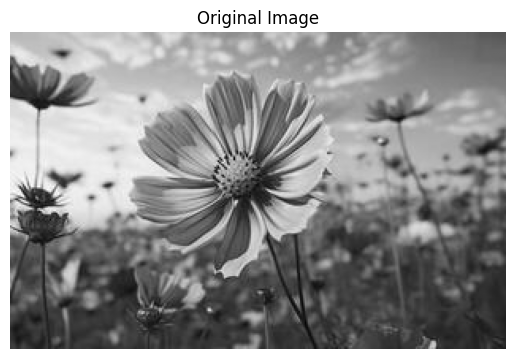

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("flower.jpg", cv2.IMREAD_GRAYSCALE)

# Original Image
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()


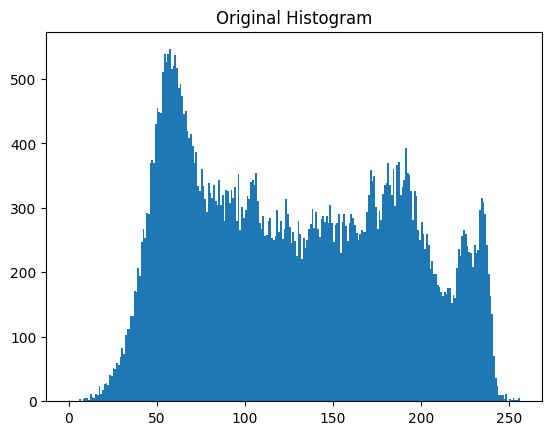

In [3]:
#plotting histogram
plt.hist(img.ravel(), bins=256, range=[0,256])
plt.title("Original Histogram")
plt.show()

(np.float64(-0.5), np.float64(312.5), np.float64(199.5), np.float64(-0.5))

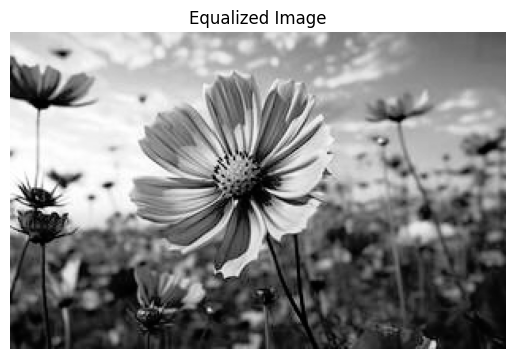

In [4]:
#eualised imag
img_eq = cv2.equalizeHist(img)

plt.imshow(img_eq, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

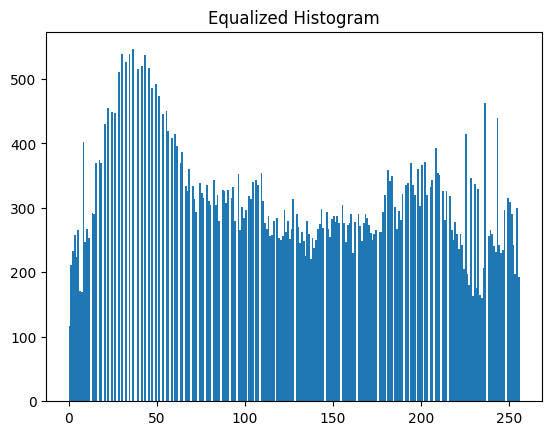

In [5]:
#equalised histogram
plt.hist(img_eq.ravel(), bins=256, range=[0,256])
plt.title("Equalized Histogram")
plt.show()


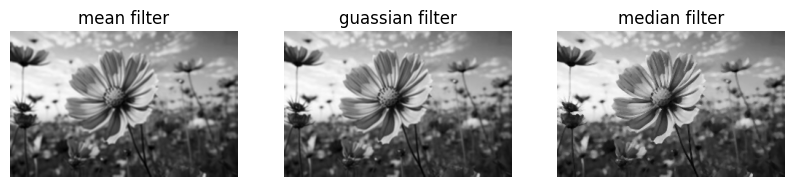

In [2]:
#soatial domain filter
mean_filter = cv2.blur(img, (3,3))
gaussian_filter = cv2.GaussianBlur(img, (3,3), 0)
median_filter = cv2.medianBlur(img, 3)

titles = ["mean filter", "guassian filter", "median filter"]
filters = [mean_filter, gaussian_filter, median_filter]

plt.figure(figsize=(10,6))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(filters[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")
plt.show()

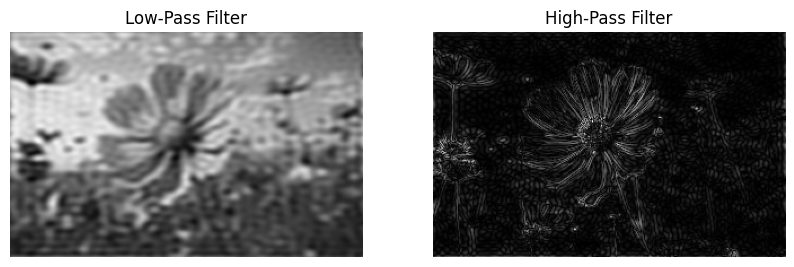

In [4]:
#frequency domain filtering
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
rows, cols = img.shape
crow, ccol = rows//2, cols//2

mask = np.zeros((rows, cols), np.uint8)
r = 30
cv2.circle(mask, (ccol, crow), r, 1, -1)

f_low = fshift * mask
f_high = fshift * (1 - mask)

img_low = np.abs(np.fft.ifft2(np.fft.ifftshift(f_low)))
img_high = np.abs(np.fft.ifft2(np.fft.ifftshift(f_high)))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_low, cmap='gray')
plt.title("Low-Pass Filter")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_high, cmap='gray')
plt.title("High-Pass Filter")
plt.axis("off")
plt.show()
